# K-means Clustering

## Steps

Given k , the K-means algorithm works as follows:

1. Randomly choose k data points to be the initial centroids
1. Assign each data point to the closest centroid
1. Re-compute the centroids of the current clusters
1. If a convergence criterion is not met, go to step 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
def load_dataset(name):
    return np.loadtxt(name)

In [3]:
def euclidean(a, b):
    return np.linalg.norm(a-b)

In [4]:
def kmeans(k, epsilon = 0):
    """
    input:
        k - number of clusters
        eplison - minimum error required for stop condition
    output:
        prototype - calculated centroids
        history_centroids - History of centroids calculated in each iteration
        belongs_to - assignments for which cluster each datapoint belongs to
    """
    
    history_centroids = []
    dataset = load_dataset("data.txt")
    num_instances, num_features = dataset.shape
    #define k centroids chosen randomly
    prototypes = dataset[np.random.randint(0, num_instances - 1, size = k)]
    history_centroids.append(prototypes)
    prototypes_old = np.zeros(prototypes.shape)
    #belongs_to stores the index of the closest centroid from the list prototypes for each instance
    belongs_to = np.zeros((num_instances, 1))
    #norm is indicative of how centroids change over each iteration
    norm = euclidean(prototypes, prototypes_old)
    iteration = 0
    
    #stop when norm = epsilon that is centroids no longer change after a iteration
    while norm > epsilon:
        iteration += 1
        norm = euclidean(prototypes, prototypes_old)
        
        for instance_index, instance in enumerate(dataset):
            #distance vector storing distance between instance and each centroid
            dist_vec = np.zeros((k,1))
            for prototype_index, prototype in enumerate(prototypes):
                dist_vec[prototype_index] = euclidean(prototype, instance)
            #set the instance to the index of the closest centroid from the list of current centroids
            belongs_to[instance_index, 0] = np.argmin(dist_vec)
        
        tmp_prototypes = np.zeros((k, num_features))
        
        #recompute centroids
        for index in range(len(prototypes)):
            #get all instances for cluster with id index
            instances_close = [i for i in range(len(belongs_to)) if belongs_to[i] == index]
            prototype = np.mean(dataset[instances_close], axis = 0)
            tmp_prototypes[index, :] = prototype
        
        prototypes_old = prototypes
        prototypes = tmp_prototypes
        history_centroids.append(tmp_prototypes)
        
        print(iteration, "-> \tnorm = ",norm,"\n\tcentroids = ", prototypes.tolist())
    
    return prototypes, history_centroids, belongs_to

In [5]:
#lets define a plotting algorithm for our dataset and our centroids
def plot(dataset, history_centroids, belongs_to):
    #we'll have 2 colors for each centroid cluster
    colors = ['r', 'g']

    #split our graph by its axis and actual plot
    fig, ax = plt.subplots()

    #for each point in our dataset
    for index in range(dataset.shape[0]):
        #get all the points assigned to a cluster
        instances_close = [i for i in range(len(belongs_to)) if belongs_to[i] == index]
        #assign each datapoint in that cluster a color and plot it
        for instance_index in instances_close:
            ax.plot(dataset[instance_index][0], dataset[instance_index][1], (colors[index] + 'o'))

    #lets also log the history of centroids calculated via training
    history_points = []
    #for each centroid ever calculated
    for index, centroids in enumerate(history_centroids):
        #print them all out
        for inner, item in enumerate(centroids):
            if index == 0:
                history_points.append(ax.plot(item[0], item[1], 'bo')[0])
            else:
                history_points[inner].set_data(item[0], item[1])
                print("centroids {} {}".format(index, item))

                plt.show()

In [6]:
#main file 
def execute():
    dataset = load_dataset('data.txt')
    centroids, history_centroids, belongs_to = kmeans(2)
    #print(centroids, "\n", belongs_to)
    plot(dataset, history_centroids, belongs_to)

1 -> 	norm =  145.90044002122198 
	centroids =  [[1.0204179928624049, 122.79580448421555], [0.9658033511003445, 77.02231586728745]]
2 -> 	norm =  27.45337764673689 
	centroids =  [[1.0244579780237386, 120.92993409501584], [0.958728031204864, 75.21882198616377]]
3 -> 	norm =  2.595020013443931 
	centroids =  [[1.0631859447098155, 119.13153719531226], [0.9179229891239566, 73.3626412698246]]
4 -> 	norm =  2.5851118288065766 
	centroids =  [[1.022813637088538, 117.42096650770992], [0.9495544094148523, 71.40168485426985]]
5 -> 	norm =  2.6026971800349754 
	centroids =  [[1.0177558839803893, 116.6036242449605], [0.9523065879473013, 70.36033526473916]]
6 -> 	norm =  1.3238166404171088 
	centroids =  [[1.0177558839803893, 116.6036242449605], [0.9523065879473013, 70.36033526473916]]
7 -> 	norm =  0.0 
	centroids =  [[1.0177558839803893, 116.6036242449605], [0.9523065879473013, 70.36033526473916]]


<IPython.core.display.Javascript object>


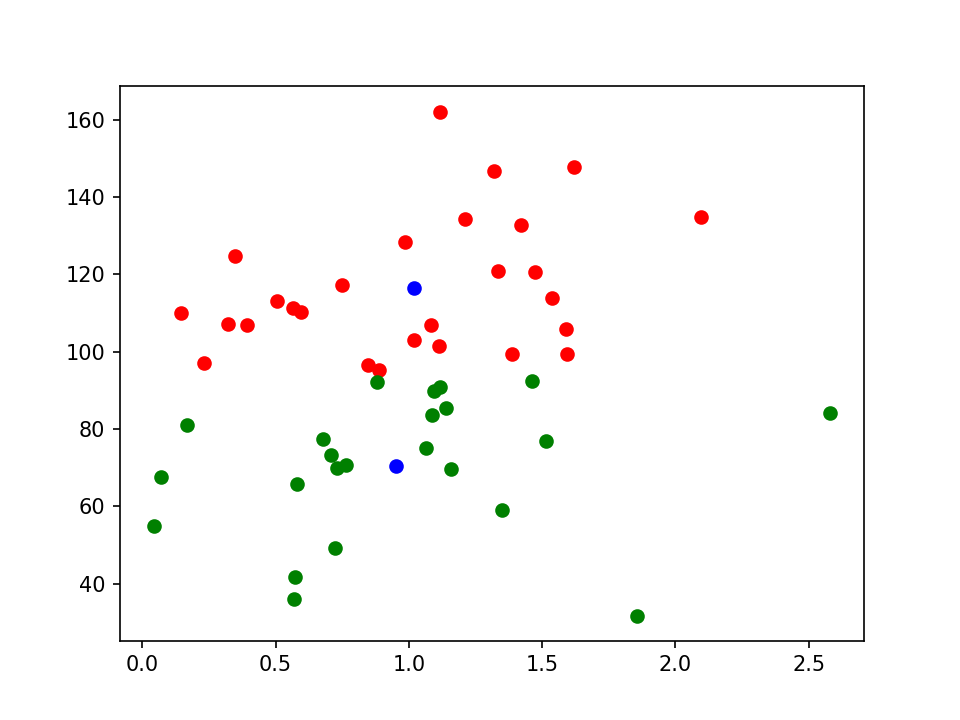

centroids 1 [  1.02041799 122.79580448]
centroids 1 [ 0.96580335 77.02231587]
centroids 2 [  1.02445798 120.9299341 ]
centroids 2 [ 0.95872803 75.21882199]
centroids 3 [  1.06318594 119.1315372 ]
centroids 3 [ 0.91792299 73.36264127]
centroids 4 [  1.02281364 117.42096651]
centroids 4 [ 0.94955441 71.40168485]
centroids 5 [  1.01775588 116.60362424]
centroids 5 [ 0.95230659 70.36033526]
centroids 6 [  1.01775588 116.60362424]
centroids 6 [ 0.95230659 70.36033526]
centroids 7 [  1.01775588 116.60362424]
centroids 7 [ 0.95230659 70.36033526]


In [10]:
%matplotlib notebook
execute()